AI in Medical Sciences and Psychology by Tshepo Chris Nokeri, Apress. 2022

# Chapte 9: A Case for Psychology Factoring and Clustering Personality Dimensions

This chapter introduces you to analyzing the underlying patterns in human behavior by promptly executing exploratory factor analysis and cluster analysis. To begin with, it covers the big five personality dimensions. Following that, it presents an approach for typically collecting data by retaining a Likert scale and measuring the reliability of the scale with Cronbach’s reliability testing strategy. Subsequently, it performs factor analysis; beginning with estimating Bartlett Sphericity statistics, then the Kaiser-Meyer-Olkin statistic. Following that, it rotates the eigenvalues by executing the varimax method and estimates the proportional variances and cumulative variances. In addition, it executes the K-Means method to observe clusters in the data; beginning with standardizing the data and performing principal component analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
big_five_data = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Next_Chapter\source_code\big_five_data\data-final.csv", sep = "\t")
big_five_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


# Preprocessing the Data

In [2]:
big_five_data.drop(big_five_data.columns[50:110], axis = 1, inplace = True)
big_five_data = big_five_data[(big_five_data > 0).all(axis=1)]

# Carrying out the Cronbach’s Reliability Testing Strategy

In [3]:
import pingouin as pg
pg.cronbach_alpha(data = big_five_data)

(0.5199338748916366, array([0.518, 0.521]))

# Carrying out the Factor Model

## Carrying out the Bartlett Sphericity Test

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square, p_values = calculate_bartlett_sphericity(big_five_data)
chi_square = pd.DataFrame(pd.Series(chi_square),columns=["Chi squared"])
p_values = pd.DataFrame(pd.Series(p_values),columns = ["P value"])
barlett_sphericity = pd.concat([chi_square, p_values],axis=1)
barlett_sphericity = barlett_sphericity.transpose()
barlett_sphericity.columns = ["Bartlett sphericity"]
barlett_sphericity

,Bartlett sphericity
Chi squared,1.717619e+07
P value,0.000000e+00


## Carrying out the Kaiser-Meyer-Olkin Test

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kaiser_meyer_olkin_variance, kaiser_meyer_olkin_test = calculate_kmo(big_five_data)
kaiser_meyer_olkin_test = pd.DataFrame(pd.Series(kaiser_meyer_olkin_test))
kaiser_meyer_olkin_test.columns = ["KMO Test"]
kaiser_meyer_olkin_test.index = ["P value"]
kaiser_meyer_olkin_test

,KMO Test
P value,0.908983


## Carrying out the Kaiser-Meyer-Olkin Test

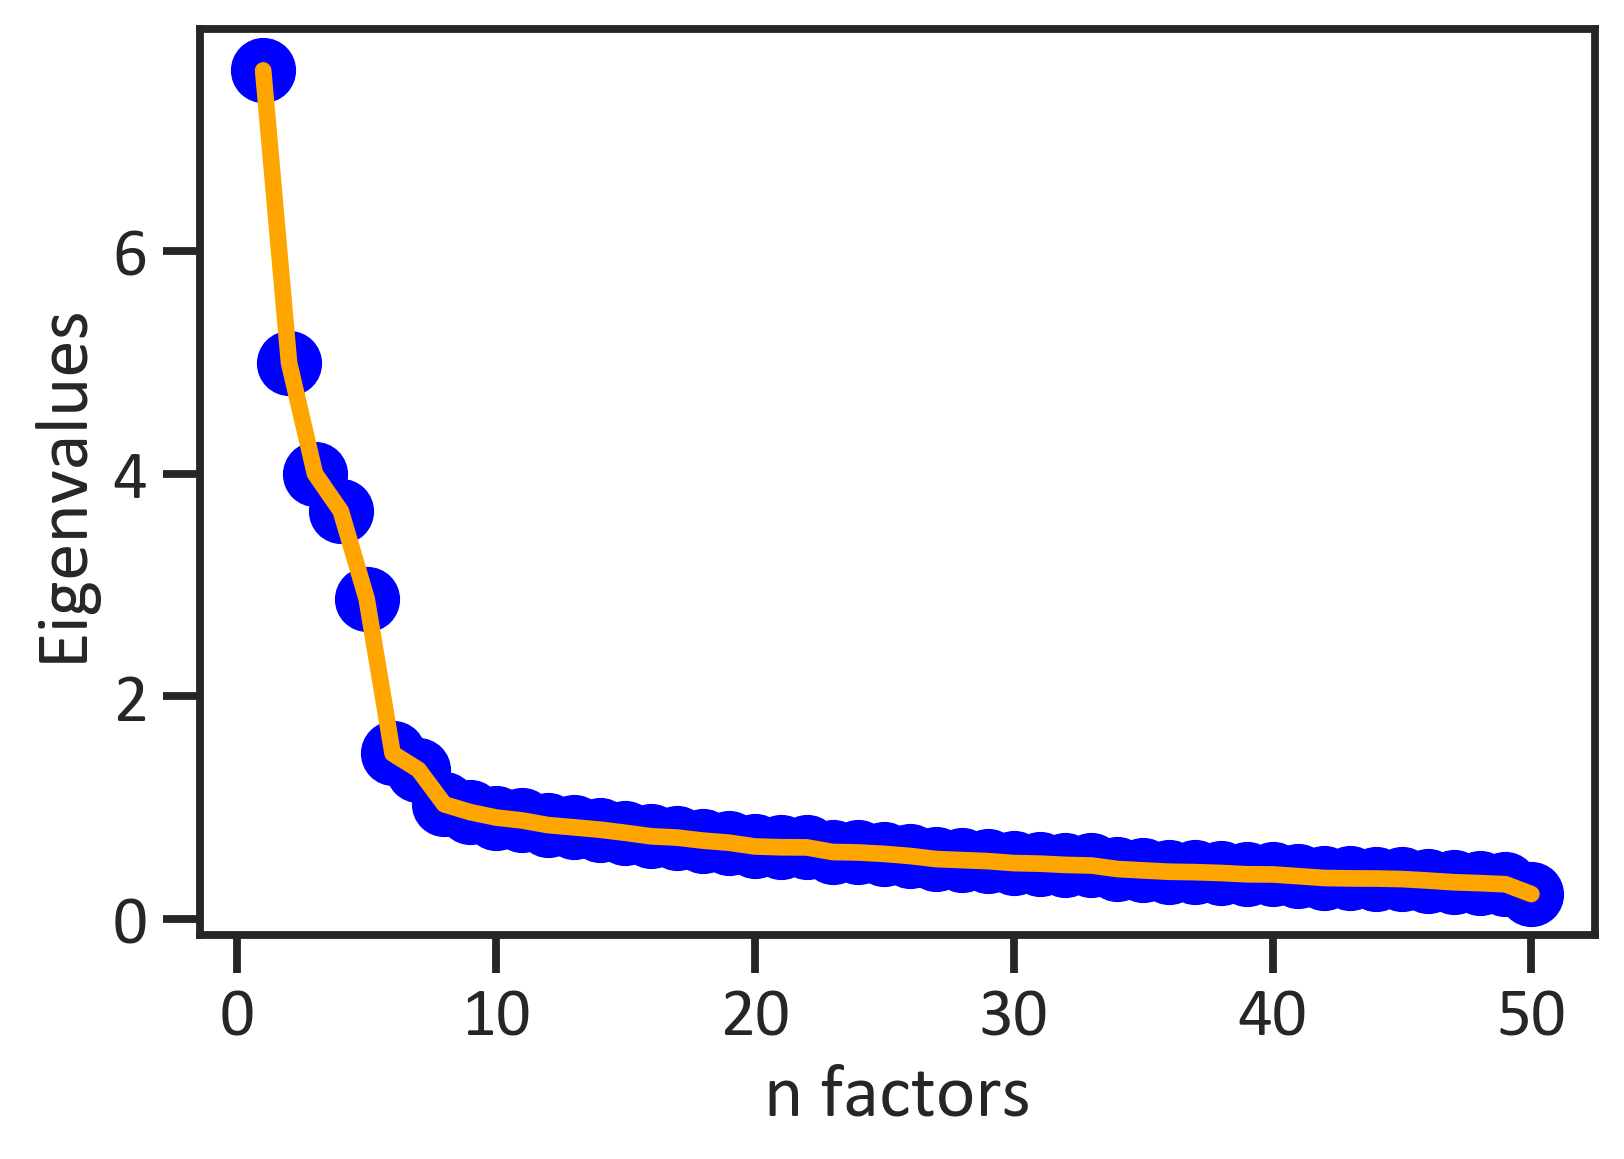

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks", font_scale = 1, font = "Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
from factor_analyzer import FactorAnalyzer
factor_analys_model = FactorAnalyzer(rotation = None,impute = "drop", n_factors = big_five_data.shape[1])
factor_analys_model.fit(big_five_data)
eigenvalues,_ = factor_analys_model.get_eigenvalues()
plt.scatter(range(1, big_five_data.shape[1]+1), eigenvalues, s = 200, color = "blue")
plt.plot(range(1, big_five_data.shape[1]+1), eigenvalues, lw = 4, color = "orange")
plt.xlabel("n factors")
plt.ylabel("Eigenvalues")
plt.show()

## Carrying out the Kaiser-Meyer-Olkin Test

In [7]:
factor_analysis_model = FactorAnalyzer(n_factors = 5, rotation = "varimax")
factor_analysis_model.fit(big_five_data)
rotation = pd.DataFrame(factor_analysis_model.loadings_, index = big_five_data.columns)
rotation.columns = ["Factor 1",
                    "Factor 2",
                    "Factor 3",
                    "Factor 4",
                    "Factor 5"]
rotation

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
EXT1,0.695725,-0.041532,0.071403,-0.009142,0.017345
EXT2,-0.701616,-0.006997,-0.132951,0.020675,-0.039147
EXT3,0.642162,-0.258014,0.255137,0.095699,-0.025813
EXT4,-0.738570,0.115534,-0.050113,-0.027933,-0.005537
EXT5,0.720532,-0.075416,0.210091,0.082719,0.069474
EXT6,-0.545367,0.059033,-0.139545,-0.026986,-0.260178
EXT7,0.716289,-0.087368,0.152714,0.025976,0.016274
EXT8,-0.595159,0.031824,0.040168,0.069637,-0.048275
EXT9,0.639384,-0.051900,-0.029303,-0.045866,0.126483
EXT10,-0.676138,0.161479,-0.063951,-0.030044,-0.013397


## Discerning the Proportional and Cumulative Variance

In [8]:
factor_analysis_model_variance = pd.DataFrame(factor_analysis_model.get_factor_variance(), index=["Variance",
                                                                            "Proportional Variance",
                                                                            "Cumulative Variance"])
factor_analysis_model_variance.columns = ["Factor 1",
                                          "Factor 2",
                                          "Factor 3",
                                          "Factor 4",
                                          "Factor 5"]
factor_analysis_model_variance 

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Variance,5.111276,4.613167,3.877640,3.393025,3.286570
Proportional Variance,0.102226,0.092263,0.077553,0.067860,0.065731
Cumulative Variance,0.102226,0.194489,0.272042,0.339902,0.405634


## Discerning the Communalities

In [9]:
factor_analysis_model_variance_comm = pd.DataFrame(factor_analysis_model.get_communalities(),
                                                   index = big_five_data.columns,
                                                   columns = ["Communalities"])
factor_analysis_model_variance_comm


,Communalities
EXT1,0.491242
EXT2,0.511950
EXT3,0.553863
EXT4,0.562156
EXT5,0.580662
EXT6,0.388804
EXT7,0.544965
EXT8,0.364021
EXT9,0.430465
EXT10,0.488410


# Carrying out Cluster Analyis

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(big_five_data)
scaler = StandardScaler()
standardized_big_five_data = scaler.fit_transform(big_five_data)
pca_big_five_data = pca.transform(standardized_big_five_data)
big_five_data_kmeans = KMeans(n_clusters = 5)
big_five_data_kmeans_model = big_five_data_kmeans.fit(pca_big_five_data)
big_five_data_kmeans_model

KMeans(n_clusters=5)

In [11]:
big_five_data_kmeans_labels = pd.DataFrame(big_five_data_kmeans_model.labels_, columns = ["Clusters"])
big_five_data_kmeans_labels

,Clusters
0,3
1,0
2,3
3,2
4,3
...,...
874429,0
874430,2
874431,4
874432,2


In [12]:
big_five_data_kmeans_centers = big_five_data_kmeans_model.cluster_centers_
big_five_data_kmeans_centroids = pd.DataFrame(big_five_data_kmeans_centers).transpose()
big_five_data_kmeans_centroids.columns = ["Cluster 1","Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
big_five_data_kmeans_centroids

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,0.731960,0.000763,1.073392,-4.184590,-2.369164
1,8.218574,10.054972,6.910572,8.488166,5.133547
2,6.345430,8.198653,5.121364,5.581356,6.957356
3,4.619322,2.588736,1.623280,2.589200,2.779065
4,-7.232217,-4.351978,-5.423782,-5.815713,-5.670860


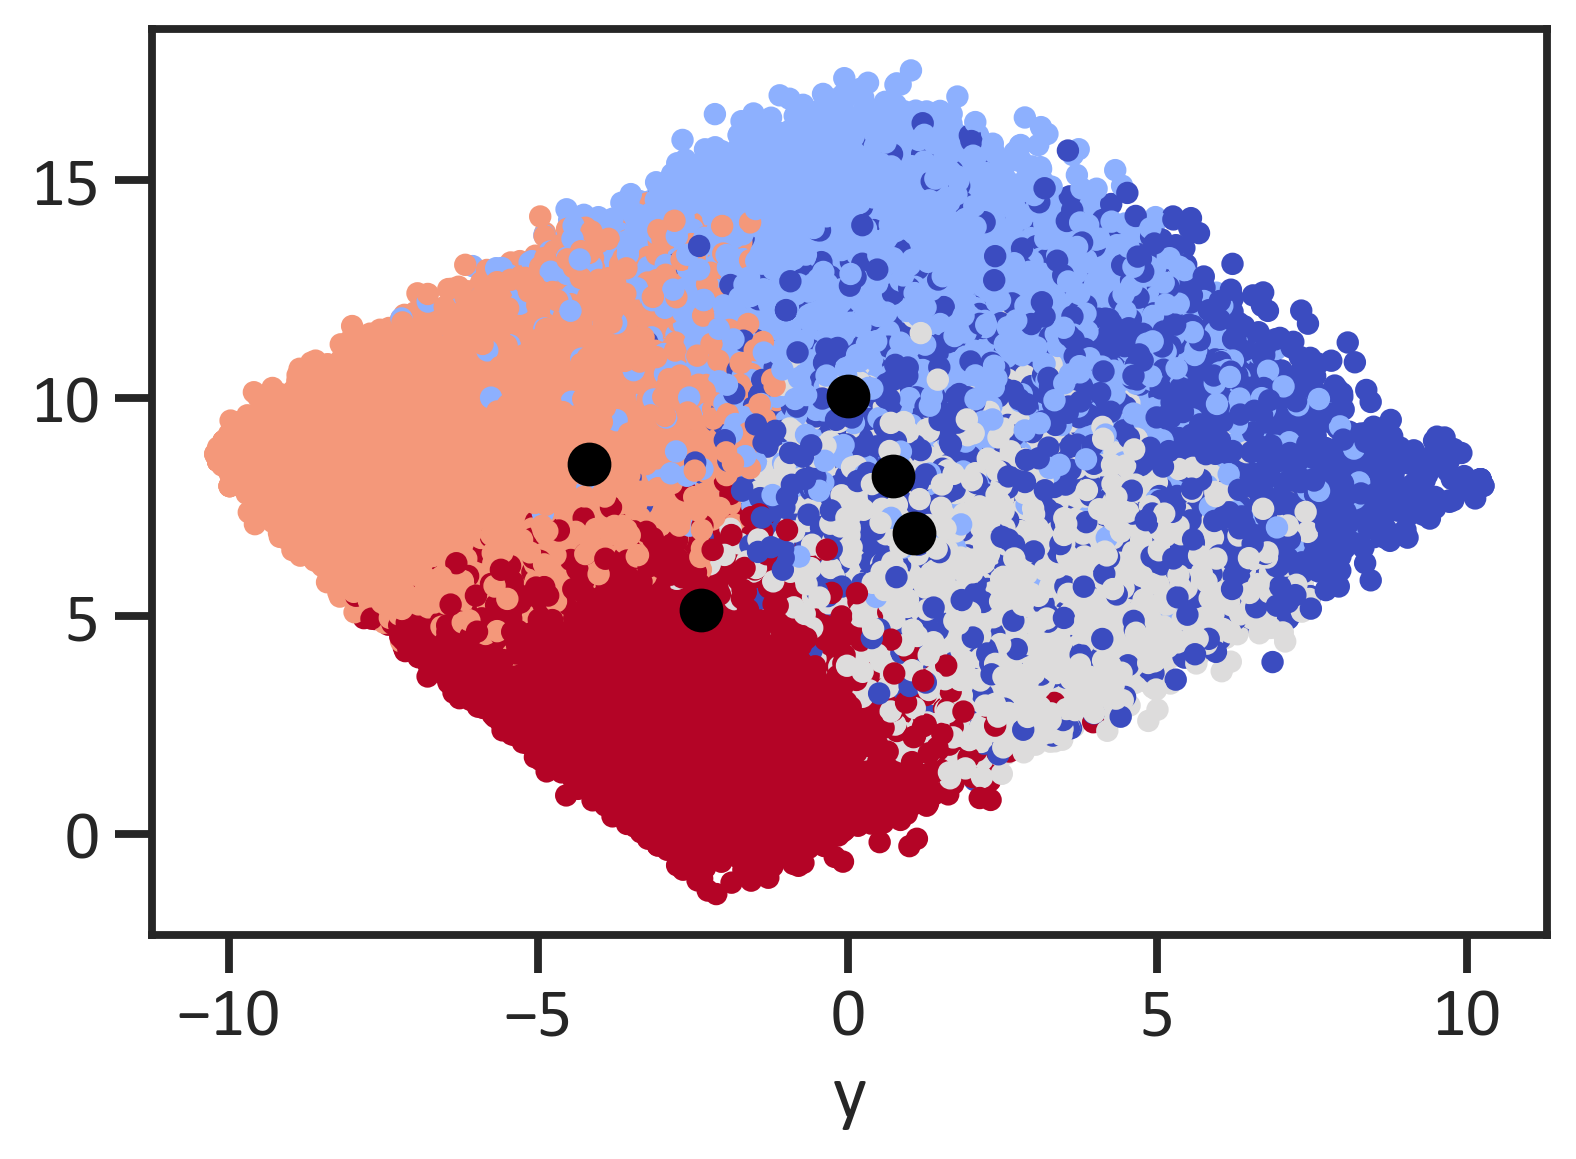

In [14]:
fig, ax = plt.subplots()
plt.scatter(pca_big_five_data[:,0], pca_big_five_data[:,1], c=big_five_data_kmeans_model.labels_, cmap = "coolwarm",s = 15)
plt.scatter(big_five_data_kmeans_centers[:,0], big_five_data_kmeans_centers[:,1], color="black")
plt.xlabel("y")
plt.show()